<a href="https://colab.research.google.com/github/jhlopesalves/Datacamp-Notebooks/blob/main/Python/Intro%20to%20Matplotlib/introduction_to_matplotlb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# Create the data directory if it doesn't exist
!mkdir -p data

# Download the files using wget
!wget -O data/seattle_weather.csv https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Intro%20to%20Matplotlib/data/seattle_weather.csv
!wget -O data/austin_weather.csv https://raw.githubusercontent.com/jhlopesalves/Datacamp-Notebooks/main/Python/Intro%20to%20Matplotlib/data/austin_weather.csv

In [5]:
# Load the dataset
seattle_weather = pd.read_csv("data/seattle_weather.csv")
austin_weather = pd.read_csv("data/austin_weather.csv")

In [6]:
# Convert the 'DATE' column to datetime objects
seattle_weather['DATE'] = pd.to_datetime(seattle_weather['DATE'], format='%m')
austin_weather['DATE'] = pd.to_datetime(austin_weather['DATE'], format='%m')

# Create the 'MONTH' column with month initials
seattle_weather['MONTH'] = seattle_weather['DATE'].dt.strftime('%b')
austin_weather['MONTH'] = austin_weather['DATE'].dt.strftime('%b')

In [22]:
# Group data by month and calculate the mean precipitation
# .reindex() is used to ensure the months are in chronological order on the plot
seattle_monthly_avg = seattle_weather.groupby("MONTH")["MLY-PRCP-NORMAL"].mean().reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# This line does the same process for the 'austin_weather' DataFrame
austin_monthly_avg = austin_weather.groupby("MONTH")["MLY-PRCP-NORMAL"].mean().reindex(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

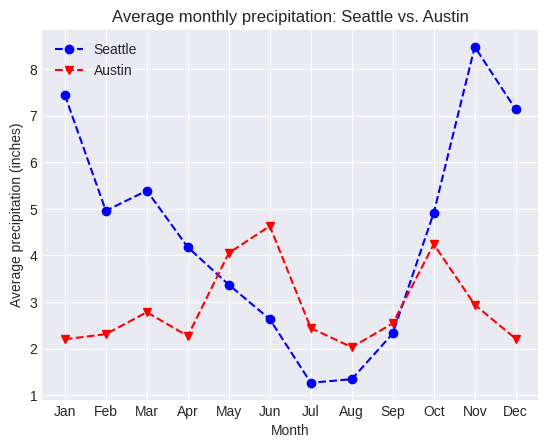

In [23]:
# Set default style
plt.style.use("seaborn-v0_8-darkgrid")

# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Plot the monthly average precipitation
ax.plot(seattle_monthly_avg.index, seattle_monthly_avg.values, label='Seattle', color='b', marker='o', linestyle='--')

ax.plot(austin_monthly_avg.index, austin_monthly_avg.values, label='Austin', color='r', marker='v', linestyle='--')

# Add labels and title
ax.set_xlabel("Month")
ax.set_ylabel("Average precipitation (inches)")
ax.set_title("Average monthly precipitation: Seattle vs. Austin")
ax.legend()

# Call the show function
plt.show()

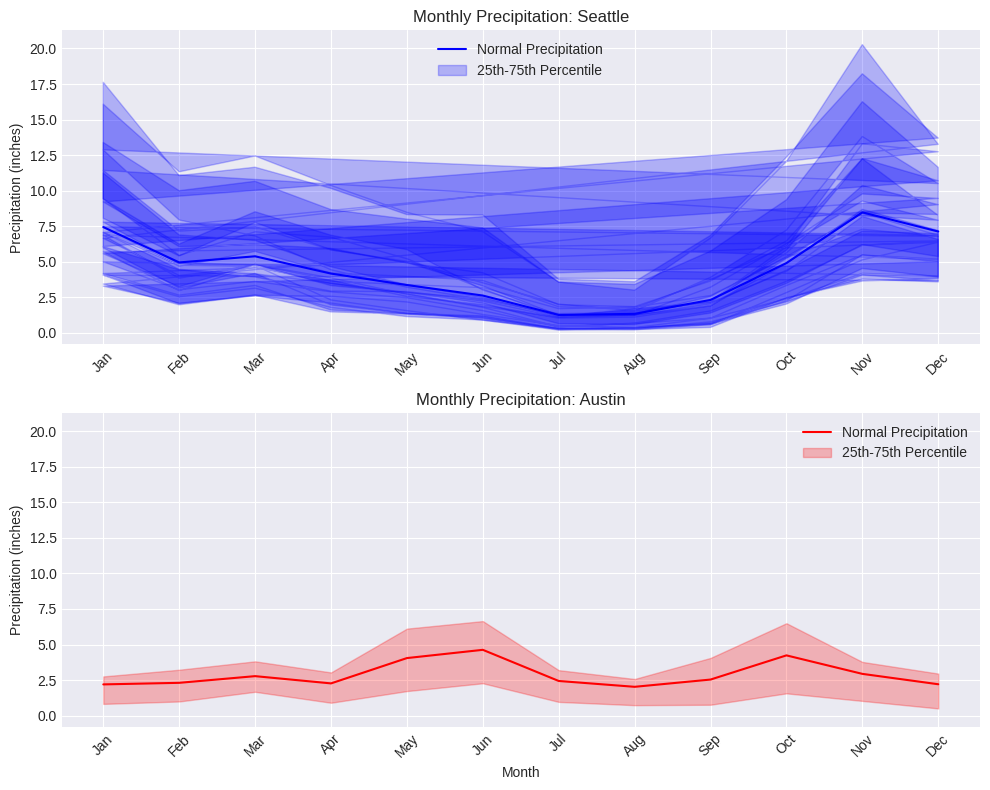

In [33]:
# Create a figure and an array of axes: 2 rows, 1 column with shared y axis
# sharey=True ensures that both subplots share the same y-axis scale.
fig, ax = plt.subplots(2, 1, sharey=True, figsize=(10, 8))

# Plot Seattle precipitation data in the top axes (ax[0])
# ax[0].plot() plots the line for normal precipitation.
ax[0].plot(seattle_monthly_normal_avg.index, seattle_monthly_normal_avg.values, color='b', label='Normal Precipitation')
# ax[0].fill_between() fills the area between two horizontal curves.
# seattle_weather['MONTH'] provides the x-values.
# seattle_weather['MLY-PRCP-25PCTL'] provides the lower y-values (25th percentile).
# seattle_weather['MLY-PRCP-75PCTL'] provides the upper y-values (75th percentile).
# color='b' sets the fill color to blue.
# alpha=0.25 sets the transparency of the fill.
# label='25th-75th Percentile' sets the label for the legend.
# This visualizes the interquartile range (IQR), a measure of statistical dispersion.
ax[0].fill_between(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-25PCTL'], seattle_weather['MLY-PRCP-75PCTL'], color='b', alpha=0.25, label='25th-75th Percentile')
# ax[0].set_ylabel() sets the label for the y-axis.
ax[0].set_ylabel("Precipitation (inches)")
# ax[0].set_title() sets the title for the subplot.
ax[0].set_title("Monthly Precipitation: Seattle")
# ax[0].legend() displays the legend with the specified labels.
ax[0].legend()
# ax[0].tick_params() customizes the ticks.
# axis='x' specifies the x-axis.
# rotation=45 rotates the x-axis labels by 45 degrees for better readability, especially with longer labels.
ax[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability


# Plot Austin precipitation data in the bottom axes (ax[1])
# This follows the same logic as the Seattle plot, but for Austin data.
ax[1].plot(austin_monthly_normal_avg.index, austin_monthly_normal_avg.values, color='r', label='Normal Precipitation')
ax[1].fill_between(austin_weather['MONTH'], austin_weather['MLY-PRCP-25PCTL'], austin_weather['MLY-PRCP-75PCTL'], color='r', alpha=0.25, label='25th-75th Percentile')
# ax[1].set_xlabel() sets the label for the x-axis (only needed for the bottom plot since the x-axis is shared).
ax[1].set_xlabel("Month")
# ax[1].set_ylabel() sets the label for the y-axis.
ax[1].set_ylabel("Precipitation (inches)")
# ax[1].set_title() sets the title for the subplot.
ax[1].set_title("Monthly Precipitation: Austin")
# ax[1].legend() displays the legend.
ax[1].legend()
# ax[1].tick_params() rotates the x-axis labels.
ax[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability


# plt.tight_layout() automatically adjusts the subplot parameters to give a tight layout.
# This prevents labels and titles from overlapping.
plt.tight_layout()
# plt.show() displays the figure with all the subplots.
plt.show()